In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from tensorflow.keras.datasets import mnist

In [3]:
(X_train, _), (X_test, _) = mnist.load_data()

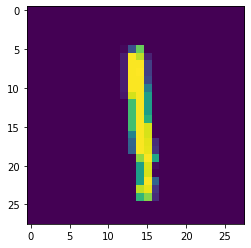

In [4]:
plt.imshow(X_train[8])

In [5]:
X_train = X_train/255
X_test = X_test/255

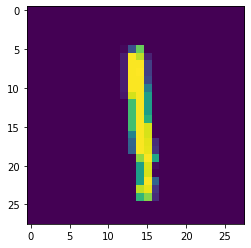

In [6]:
plt.imshow(X_train[8])

In [7]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten,Reshape
from tensorflow.keras.optimizers import SGD

In [8]:
encoder = Sequential()
encoder.add(Flatten(input_shape=[28,28]))
encoder.add(Dense(400,activation="relu"))
encoder.add(Dense(300,activation="relu"))
encoder.add(Dense(200,activation="relu"))
encoder.add(Dense(100,activation="relu"))
encoder.add(Dense(50,activation="relu"))
encoder.add(Dense(25,activation="relu"))

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [9]:
decoder = Sequential()
decoder.add(Dense(50,input_shape=[25],activation='relu'))
decoder.add(Dense(100,activation='relu'))
decoder.add(Dense(200,activation='relu'))
decoder.add(Dense(300,activation='relu'))
decoder.add(Dense(400,activation='relu'))
decoder.add(Dense(28 * 28, activation="sigmoid"))
decoder.add(Reshape([28, 28]))

In [10]:
autoencoder = Sequential([encoder, decoder])
autoencoder.compile(loss="binary_crossentropy",optimizer=SGD(lr=1.5),metrics=['accuracy'])

In [11]:
autoencoder.fit(X_train, X_train, epochs=5,validation_data=[X_test, X_test])

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 42s 701us/sample - loss: 0.2568 - acc: 0.7924 - val_loss: 0.2326 - val_acc: 0.7908
Epoch 2/5
60000/60000 [==============================] - 31s 514us/sample - loss: 0.2081 - acc: 0.7946 - val_loss: 0.1888 - val_acc: 0.7984
Epoch 3/5
60000/60000 [==============================] - 58s 972us/sample - loss: 0.1727 - acc: 0.7998 - val_loss: 0.1589 - val_acc: 0.8001
Epoch 4/5
60000/60000 [==============================] - 35s 582us/sample - loss: 0.1560 - acc: 0.8028 - val_loss: 0.1516 - val_acc: 0.8015
Epoch 5/5
60000/60000 [==============================] - 49s 809us/sample - loss: 0.1495 - acc: 0.8039 - val_loss: 0.1489 - val_acc: 0.8054


In [12]:
predicted = autoencoder.predict(X_test[:10])

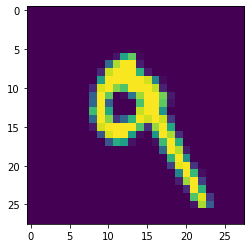

In [13]:
plt.imshow(X_test[7])

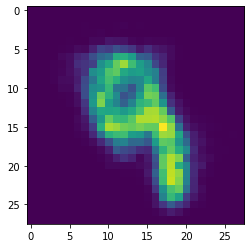

In [14]:
plt.imshow(predicted[7])

In [15]:
encoder = Sequential()
encoder.add(Flatten(input_shape=[28,28]))
encoder.add(Dense(400,activation="relu"))
encoder.add(Dense(300,activation="relu"))

decoder = Sequential()
decoder.add(Dense(350,input_shape=[300],activation='relu'))
decoder.add(Dense(400,activation='relu'))
decoder.add(Dense(28 * 28, activation="sigmoid"))

decoder.add(Reshape([28, 28]))

autoencoder = Sequential([encoder, decoder])
autoencoder.compile(loss="binary_crossentropy",optimizer=SGD(lr=0.5),metrics=['accuracy'])

In [16]:
autoencoder.fit(X_train, X_train, epochs=5,validation_data=[X_test, X_test])

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 37s 621us/sample - loss: 0.2233 - acc: 0.7920 - val_loss: 0.1592 - val_acc: 0.8054
Epoch 2/5
60000/60000 [==============================] - 35s 580us/sample - loss: 0.1388 - acc: 0.8086 - val_loss: 0.1208 - val_acc: 0.8109
Epoch 3/5
60000/60000 [==============================] - 36s 597us/sample - loss: 0.1139 - acc: 0.8121 - val_loss: 0.1045 - val_acc: 0.8119
Epoch 4/5
60000/60000 [==============================] - 36s 598us/sample - loss: 0.1022 - acc: 0.8133 - val_loss: 0.0963 - val_acc: 0.8128
Epoch 5/5
60000/60000 [==============================] - 33s 558us/sample - loss: 0.0956 - acc: 0.8139 - val_loss: 0.0913 - val_acc: 0.8133


In [17]:
predicted = autoencoder.predict(X_test[:10])

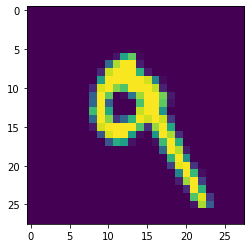

In [18]:
plt.imshow(X_test[7])

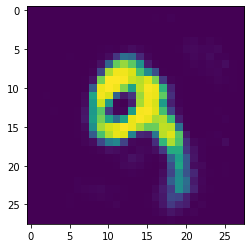

In [19]:
plt.imshow(predicted[7])